In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# read csv
df = pd.read_csv("netflix_titles.csv")

## Check Dataset Basic Information

In [41]:
df.shape

(8807, 12)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [43]:
df.duplicated().sum()

0

In [44]:
# checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [45]:
# df['type'].value_counts()
# df.head()

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Convert data_added to datetime duration to numeric 

In [ ]:
# convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# split duration into numeric and unit

df[['duration_num', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_num'] = pd.to_numeric(df['duration_num'])

In [47]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


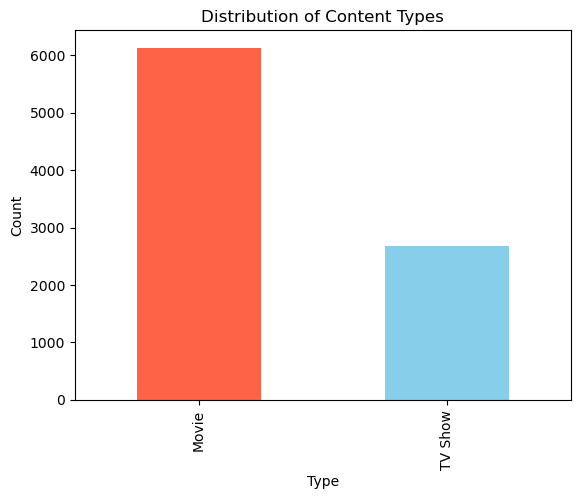

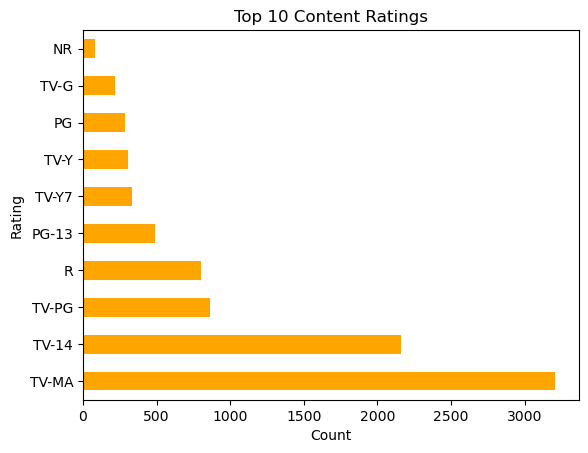

In [50]:
# Type of content
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar', color=['tomato', 'skyblue'])
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Rating distribution
rating_counts = df['rating'].value_counts().head(10)
rating_counts.plot(kind='barh', color='orange')
plt.title('Top 10 Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

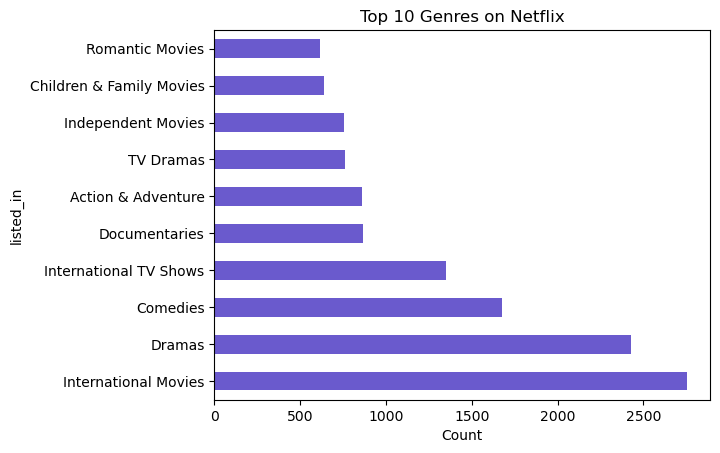

In [55]:
# Genre frequency
genres = df['listed_in'].dropna().str.split(', ').explode()
top_genres = genres.value_counts().head(10)
top_genres.plot(kind='barh', color='slateblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
# plt.gca().invert_yaxis()
plt.show()

In [59]:
# show by country
country_counts = df['country'].value_counts()

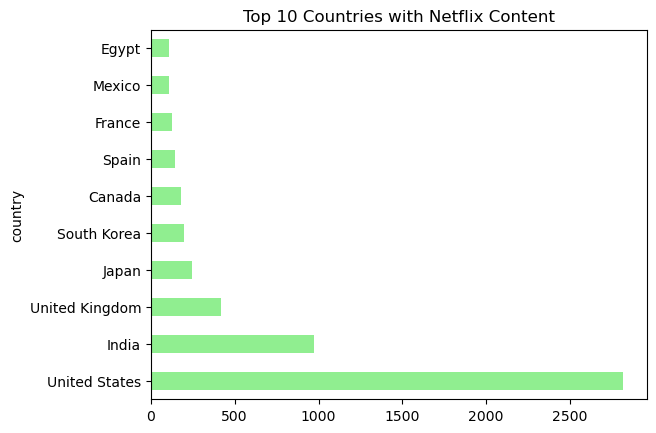

In [65]:
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Countries with Netflix Content")
top_countries = df['country'].dropna().value_counts().head(10)
top_countries.plot(kind='barh', color='lightgreen')
plt.show()

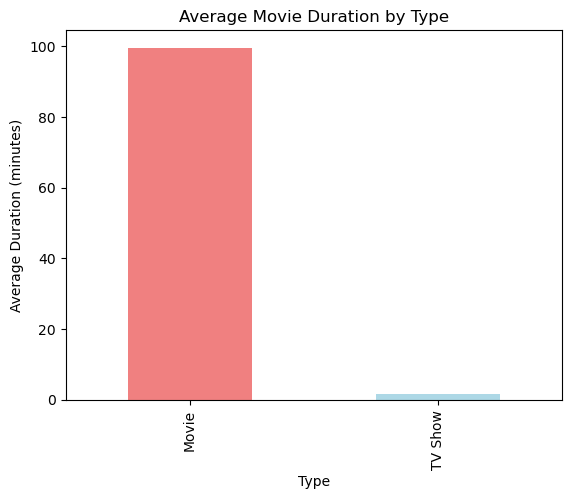

In [67]:
# average movie duration by type
avg_duration = df.groupby('type')['duration_num'].mean()
avg_duration.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Average Movie Duration by Type')
plt.xlabel('Type')
plt.ylabel('Average Duration (minutes)')
plt.show()

## 📌 Conclusion

After performing an exploratory data analysis (EDA) on the Netflix titles dataset, we discovered several key insights:

- **Movies dominate** the Netflix catalog, making up a majority of the content compared to TV Shows.
- The **most common ratings** are TV-MA, TV-14, and R, indicating that Netflix primarily targets a teen and adult audience.
- The **volume of content released** has significantly increased over time, especially after 2015, peaking around 2018–2019.
- The **year added** to Netflix shows that most content was uploaded in 2019 and 2020, likely due to global digital content expansion during the pandemic.
- **Drama**, **International Movies**, and **Comedy** are the most prevalent genres across the platform.
- The top **countries contributing to Netflix content** include the United States, India, the United Kingdom, and Canada.
- The **duration of movies** typically ranges between 80–120 minutes, while most TV Shows have 1–2 seasons.
- A significant number of records are missing data in fields like `director`, `cast`, and `country`, which can affect downstream analysis and recommendation systems.

These findings offer a broad overview of Netflix's content strategy and catalog structure, which can help guide content acquisition, regional recommendations, and audience segmentation.

